In [1]:
# Generarive Adversial Networks

In [2]:
# Importing  Libraries

import numpy as np
import keras
import keras.backend as K
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 8a61469f7ea1b51cbae51d4f78837e45 so we will re-download the data.
11493376/11490434 [==============================] - 186s 16us/step


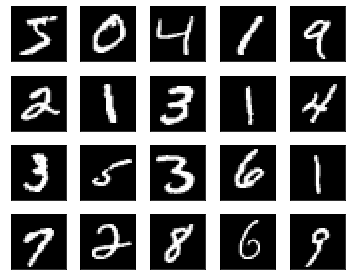

In [4]:
plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

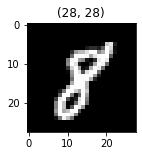

In [5]:
sample = X_train[17]

plt.figure(figsize=(3, 2))
plt.title(sample.shape)
plt.imshow(sample, cmap='gray')
plt.show()

In [6]:
X_train.min(), X_train.max()

(0, 255)

In [7]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [8]:
make_latent_samples(1, 100) # generates one sample

array([[-0.34429503,  0.11789133,  0.06421992,  1.77059678,  1.73687626,
        -1.32370376, -0.00499459,  0.01351291,  0.77754785, -0.33715664,
        -0.25134494,  1.37496108,  2.08685899, -0.97771028, -0.12221691,
         2.23602972,  1.10694075, -0.02682101, -0.32596915, -0.94443442,
         1.03485909, -0.84878832, -2.20096196,  0.52053017, -0.37170903,
         0.22622231, -1.04022392,  0.28468468, -1.13644505,  0.46100198,
        -0.73731915, -0.71312523,  0.8832082 ,  0.09329878, -1.48226196,
        -0.21287319, -0.83559391, -0.38946476, -0.1560601 , -0.41997733,
        -1.06042118, -0.13186929, -0.28643958, -0.13548388,  0.50737658,
         0.82922963,  0.25974712,  1.75662168, -0.70030167,  2.21606179,
        -0.02415635, -0.23662958,  0.66200185, -0.49714457, -1.33823069,
        -0.207433  , -1.68620758, -1.73424635,  0.29057597, -0.84685024,
         0.00870694, -0.11732883, -0.37821434,  0.92828256, -0.9393071 ,
        -0.86512419, -0.65988635, -0.9130165 , -0.2

In [9]:
generator = Sequential([
    Dense(128, input_shape=(100,)),
    LeakyReLU(alpha=0.01),
    Dense(784),
    Activation('tanh')
], name='generator')

generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               101136    
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
Total params: 114,064
Trainable params: 114,064
Non-trainable params: 0
_________________________________________________________________


In [10]:
discriminator = Sequential([
    Dense(128, input_shape=(784,)),
    LeakyReLU(alpha=0.01),
    Dense(1),
    Activation('sigmoid')
], name='discriminator')

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Maintain the same shared weights with the generator and the discriminator.
gan = Sequential([
    generator,
    discriminator
])

gan.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator (Sequential)       (None, 784)               114064    
_________________________________________________________________
discriminator (Sequential)   (None, 1)                 100609    
Total params: 214,673
Trainable params: 214,673
Non-trainable params: 0
_________________________________________________________________


In [12]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [13]:
make_trainable(discriminator, False)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 0
Non-trainable params: 100,609
_________________________________________________________________


In [14]:
def make_simple_GAN(sample_size, 
                    g_hidden_size, 
                    d_hidden_size, 
                    leaky_alpha, 
                    g_learning_rate,
                    d_learning_rate):
    K.clear_session()
    
    generator = Sequential([
        Dense(g_hidden_size, input_shape=(sample_size,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(784),        
        Activation('tanh')
    ], name='generator')    

    discriminator = Sequential([
        Dense(d_hidden_size, input_shape=(784,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(1),
        Activation('sigmoid')
    ], name='discriminator')    
    
    gan = Sequential([
        generator,
        discriminator
    ])
    
    discriminator.compile(optimizer=Adam(lr=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(lr=g_learning_rate), loss='binary_crossentropy')
    
    return gan, generator, discriminator

In [15]:
def preprocess(x):    
    x = x.reshape(-1, 784) # 784=28*28
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

In [16]:
X_train_real = preprocess(X_train)
X_test_real  = preprocess(X_test)

In [17]:
def deprocess(x):
    x = (x / 2 + 1) * 255
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

In [18]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

In [19]:
y_real_10, y_fake_10 = make_labels(10)

y_real_10, y_fake_10

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [20]:
# hyperparameters
sample_size     = 100     # latent sample size (i.e., 100 random numbers)
g_hidden_size   = 128
d_hidden_size   = 128
leaky_alpha     = 0.01
g_learning_rate = 0.0001  # learning rate for the generator
d_learning_rate = 0.001   # learning rate for the discriminator
epochs          = 100
batch_size      = 64      # train batch size
eval_size       = 16      # evaluate size
smooth          = 0.1

# labels for the batch size and the test size
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

# create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(
    sample_size, 
    g_hidden_size, 
    d_hidden_size, 
    leaky_alpha, 
    g_learning_rate,
    d_learning_rate)

losses = []
for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        # Real MNIST digit images
        X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]
        
        # latent samples and the generated digit images
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)
        
        # Training the discriminator to detect real and fake images
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        # Training the generator via GAN
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)
    
    # Evaluation
    X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]
    
    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
    g_loss  = gan.test_on_batch(latent_samples, y_eval_real) # we want the fake to be realistic!
    
    losses.append((d_loss, g_loss))
    
    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f}".format(
        e+1, epochs, d_loss, g_loss))

C:\Users\HMVU\anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch:   1/100 Discriminator Loss: 0.2056 Generator Loss: 3.5298
Epoch:   2/100 Discriminator Loss: 0.2756 Generator Loss: 3.1018
Epoch:   3/100 Discriminator Loss: 0.4168 Generator Loss: 1.3553
Epoch:   4/100 Discriminator Loss: 0.1935 Generator Loss: 2.4999
Epoch:   5/100 Discriminator Loss: 0.7601 Generator Loss: 0.8614
Epoch:   6/100 Discriminator Loss: 0.4860 Generator Loss: 1.8790
Epoch:   7/100 Discriminator Loss: 0.6380 Generator Loss: 4.0549
Epoch:   8/100 Discriminator Loss: 0.4815 Generator Loss: 1.1701
Epoch:   9/100 Discriminator Loss: 0.5289 Generator Loss: 1.2945
Epoch:  10/100 Discriminator Loss: 0.3564 Generator Loss: 1.9927
Epoch:  11/100 Discriminator Loss: 0.5273 Generator Loss: 2.5514
Epoch:  12/100 Discriminator Loss: 0.3085 Generator Loss: 2.8931
Epoch:  13/100 Discriminator Loss: 0.3628 Generator Loss: 1.8345
Epoch:  14/100 Discriminator Loss: 0.6917 Generator Loss: 1.0898
Epoch:  15/100 Discriminator Loss: 0.2863 Generator Loss: 2.6898
Epoch:  16/100 Discrimina

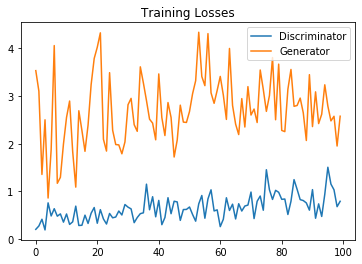

In [21]:
losses = np.array(losses)

fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

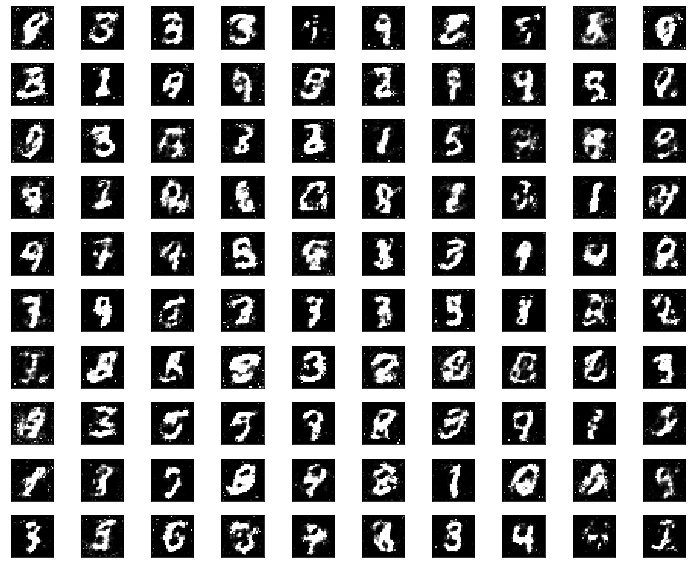

In [24]:
latent_samples = make_latent_samples(100, sample_size)
generated_digits = generator.predict(latent_samples)

plt.figure(figsize=(10, 8))
for i in range(100):
    img = deprocess(generated_digits[i])
    plt.subplot(10, 10, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()